In [62]:
#Imports
import time
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [38]:
#Configs
print(tf.__version__)
print(tf.keras.__version__)
print(len(tf.config.list_physical_devices('GPU')))

2.20.0
3.13.2
0


In [39]:
#Load dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [40]:
train_images.shape

(60000, 28, 28)

In [41]:
len(train_labels)

60000

In [42]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [43]:
test_images.shape

(10000, 28, 28)

In [44]:
len(test_labels)

10000

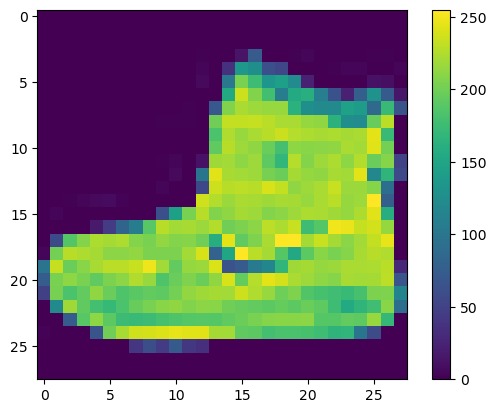

In [45]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [46]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [47]:
train_images = np.expand_dims(train_images, axis=-1)
test_images  = np.expand_dims(test_images, axis=-1)

In [48]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


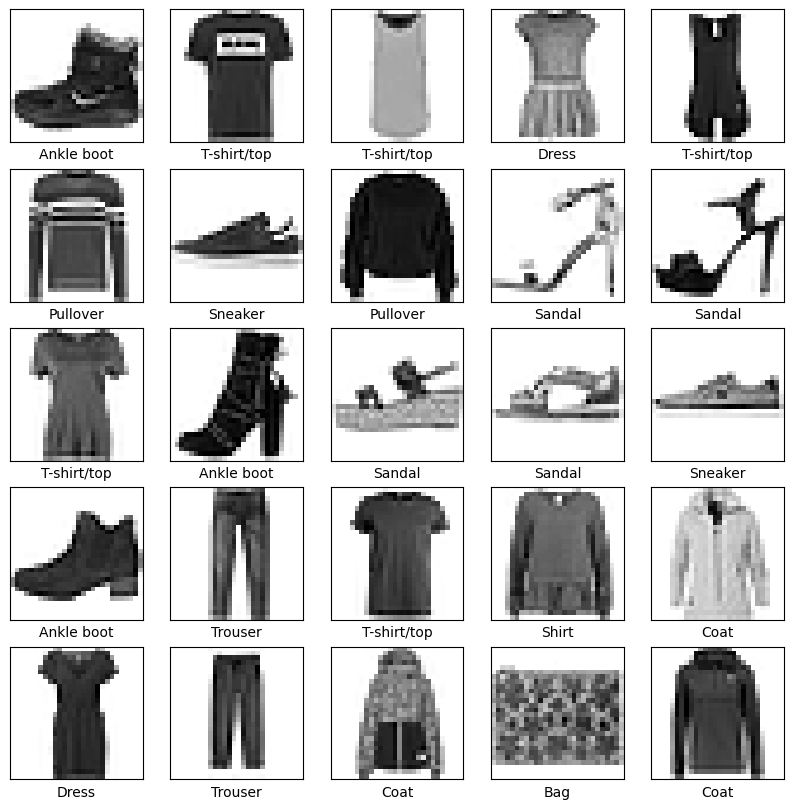

In [49]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [50]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

/Users/mardelpozo/anaconda3/envs/class-fashion/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [52]:
#Training time
start = time.time()
history = model.fit(train_images, train_labels, epochs=10, verbose=2)
cnn_time = time.time() - start
print(f"CNN training time: {cnn_time} seconds")

Epoch 1/10
1875/1875 - 21s - 11ms/step - accuracy: 0.8379 - loss: 0.4435
Epoch 2/10
1875/1875 - 19s - 10ms/step - accuracy: 0.8910 - loss: 0.3017
Epoch 3/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9049 - loss: 0.2547
Epoch 4/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9165 - loss: 0.2252
Epoch 5/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9263 - loss: 0.1982
Epoch 6/10
1875/1875 - 29s - 16ms/step - accuracy: 0.9341 - loss: 0.1748
Epoch 7/10
1875/1875 - 22s - 12ms/step - accuracy: 0.9420 - loss: 0.1535
Epoch 8/10
1875/1875 - 22s - 12ms/step - accuracy: 0.9485 - loss: 0.1348
Epoch 9/10
1875/1875 - 22s - 12ms/step - accuracy: 0.9560 - loss: 0.1188
Epoch 10/10
1875/1875 - 24s - 13ms/step - accuracy: 0.9609 - loss: 0.1046
CNN training time: 216.9519922733307 seconds


In [53]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.9132 - loss: 0.3066
Test accuracy: 0.9132000207901001


In [54]:
#Predictions
train_logits = model.predict(train_images, verbose=0)
test_logits  = model.predict(test_images, verbose=0)

In [55]:
#Class conversion
cnn_train_pred = np.argmax(train_logits, axis=1)
cnn_test_pred  = np.argmax(test_logits, axis=1)

In [56]:
#Confusion matrices
cnn_train_matrix = confusion_matrix(train_labels, cnn_train_pred)
cnn_test_matrix  = confusion_matrix(test_labels, cnn_test_pred)

In [57]:
print(cnn_train_matrix.shape)
print(cnn_test_matrix.shape)

(10, 10)
(10, 10)


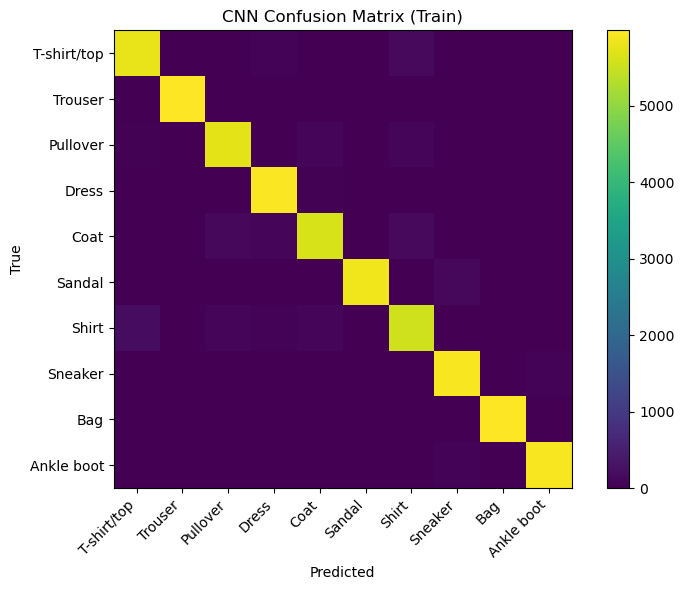

In [58]:
#Train confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cnn_train_matrix)
plt.title("CNN Confusion Matrix (Train)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(range(len(class_names)), class_names, rotation=45, ha="right")
plt.yticks(range(len(class_names)), class_names)
plt.colorbar()
plt.tight_layout()
plt.show()

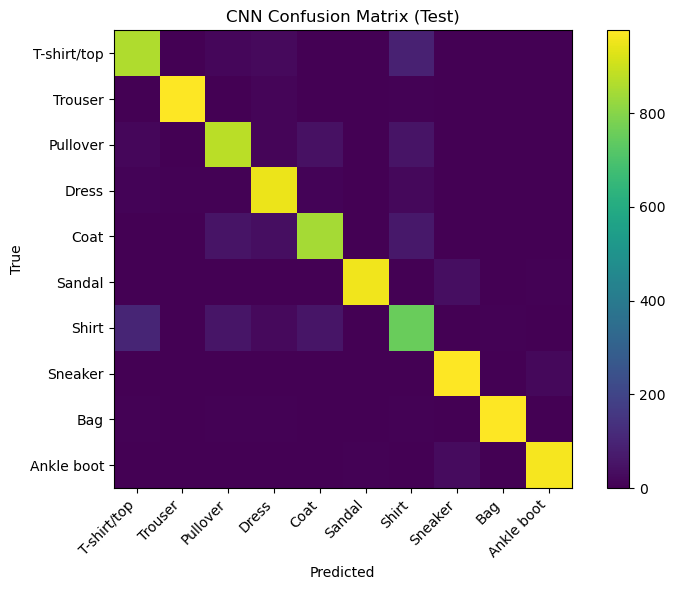

In [59]:
#Test confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cnn_test_matrix)
plt.title("CNN Confusion Matrix (Test)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(range(len(class_names)), class_names, rotation=45, ha="right")
plt.yticks(range(len(class_names)), class_names)
plt.colorbar()
plt.tight_layout()
plt.show()

In [60]:
#Classification Reports
print("CNN Classification Report (Train)")
print(classification_report(train_labels, cnn_train_pred, target_names=class_names, digits=4))

print("CNN Classification Report (Test)")
print(classification_report(test_labels, cnn_test_pred, target_names=class_names, digits=4))

CNN Classification Report (Train)
              precision    recall  f1-score   support

 T-shirt/top     0.9594    0.9640    0.9617      6000
     Trouser     0.9997    0.9980    0.9988      6000
    Pullover     0.9572    0.9572    0.9572      6000
       Dress     0.9596    0.9925    0.9757      6000
        Coat     0.9662    0.9385    0.9521      6000
      Sandal     1.0000    0.9783    0.9890      6000
       Shirt     0.9312    0.9243    0.9277      6000
     Sneaker     0.9696    0.9897    0.9795      6000
         Bag     0.9998    0.9983    0.9991      6000
  Ankle boot     0.9885    0.9895    0.9890      6000

    accuracy                         0.9730     60000
   macro avg     0.9731    0.9730    0.9730     60000
weighted avg     0.9731    0.9730    0.9730     60000

CNN Classification Report (Test)
              precision    recall  f1-score   support

 T-shirt/top     0.8637    0.8620    0.8629      1000
     Trouser     0.9959    0.9770    0.9864      1000
    Pullove

In [61]:
#Random Forest
X_train_rf = train_images.reshape(train_images.shape[0], -1)
X_test_rf = test_images.reshape(test_images.shape[0], -1)

y_train_rf = train_labels
y_test_rf = test_labels

print(X_train_rf.shape, X_test_rf.shape)

(60000, 784) (10000, 784)


In [63]:
rf = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',
    max_depth=100,
    n_jobs=-1,
    random_state=42,
)

In [64]:
start = time.time()
rf.fit(X_train_rf, y_train_rf)
rf_time = time.time() - start
print(f"Random Forest training time: {rf_time} seconds")

Random Forest training time: 17.330517053604126 seconds


In [65]:
test_acc = rf.score(X_test_rf, y_test_rf)
print('Test accuracy:', test_acc)

Test accuracy: 0.8753


In [66]:
train_pred = rf.predict(X_train_rf)
test_pred = rf.predict(X_test_rf)

In [67]:
rf_train_matrix = confusion_matrix(y_train_rf, train_pred)
rf_test_matrix = confusion_matrix(y_test_rf, test_pred)

In [68]:
print(rf_train_matrix.shape)
print(rf_test_matrix.shape)

(10, 10)
(10, 10)


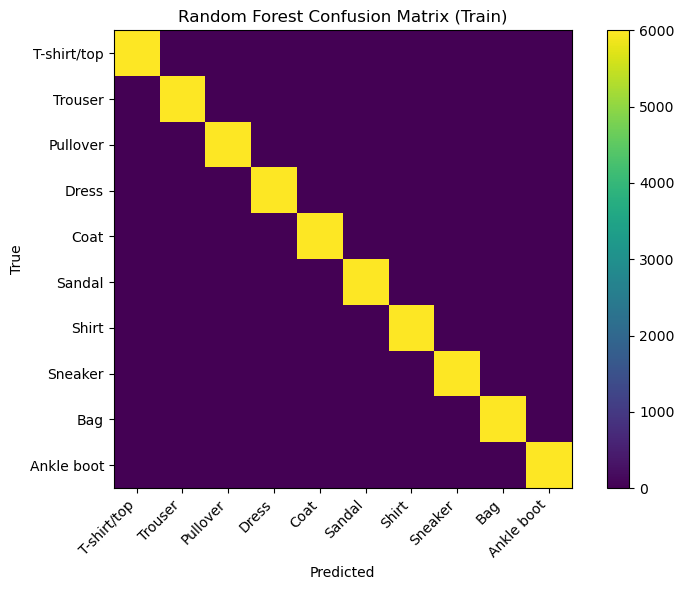

In [69]:
#Train confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(rf_train_matrix)
plt.title("Random Forest Confusion Matrix (Train)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(range(len(class_names)), class_names, rotation=45, ha="right")
plt.yticks(range(len(class_names)), class_names)
plt.colorbar()
plt.tight_layout()
plt.show()

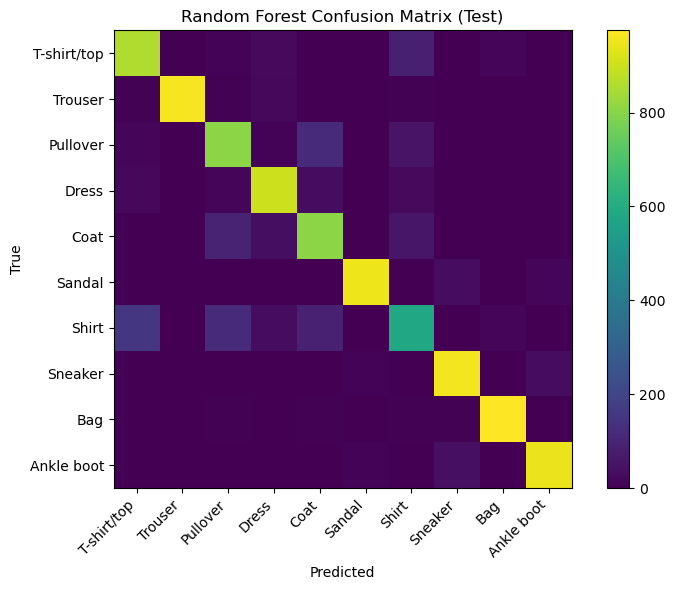

In [70]:
#Test confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(rf_test_matrix)
plt.title("Random Forest Confusion Matrix (Test)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(range(len(class_names)), class_names, rotation=45, ha="right")
plt.yticks(range(len(class_names)), class_names)
plt.colorbar()
plt.tight_layout()
plt.show()

In [71]:
#Classification Reports
print("Random Forest Classification Report (Train)")
print(classification_report(y_train_rf, train_pred, target_names=class_names, digits=4))

print("Random Forest Classification Report (Test)")
print(classification_report(y_test_rf, test_pred, target_names=class_names, digits=4))

Random Forest Classification Report (Train)
              precision    recall  f1-score   support

 T-shirt/top     1.0000    1.0000    1.0000      6000
     Trouser     1.0000    1.0000    1.0000      6000
    Pullover     1.0000    1.0000    1.0000      6000
       Dress     1.0000    1.0000    1.0000      6000
        Coat     1.0000    1.0000    1.0000      6000
      Sandal     1.0000    1.0000    1.0000      6000
       Shirt     1.0000    1.0000    1.0000      6000
     Sneaker     1.0000    1.0000    1.0000      6000
         Bag     1.0000    1.0000    1.0000      6000
  Ankle boot     1.0000    1.0000    1.0000      6000

    accuracy                         1.0000     60000
   macro avg     1.0000    1.0000    1.0000     60000
weighted avg     1.0000    1.0000    1.0000     60000

Random Forest Classification Report (Test)
              precision    recall  f1-score   support

 T-shirt/top     0.8167    0.8600    0.8378      1000
     Trouser     0.9938    0.9610    0.9771  